In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Set random seed for reproducibility
np.random.seed(42)

# Define sample size
n = 1000

# Create sample data
customer_ids = [f"CUST{str(i).zfill(4)}" for i in range(1, n+1)]
ages = np.random.randint(18, 70, n)
genders = np.random.choice(['Male', 'Female'], n)
annual_income = np.random.randint(20000, 120000, n)
product_categories = np.random.choice(['Clothing', 'Electronics', 'Groceries', 'Home Goods', 'Sports'], n)
last_purchase_dates = [datetime.today() - timedelta(days=np.random.randint(1, 365)) for _ in range(n)]
total_spend = np.random.randint(100, 5000, n)
purchase_frequency = np.random.randint(1, 30, n)
discount_availability = np.random.choice(['Yes', 'No'], n)
locations = np.random.choice(['Urban', 'Suburban', 'Rural'], n)

# Create DataFrame
data = pd.DataFrame({
    'Customer_ID': customer_ids,
    'Age': ages,
    'Gender': genders,
    'Annual_Income': annual_income,
    'Product_Category': product_categories,
    'Last_Purchase_Date': last_purchase_dates,
    'Total_Spend': total_spend,
    'Purchase_Frequency': purchase_frequency,
    'Discount_Availability': discount_availability,
    'Location': locations
})

# Convert Last_Purchase_Date to datetime format
data['Last_Purchase_Date'] = pd.to_datetime(data['Last_Purchase_Date'])

# Show the first few rows
data.head()


,Customer_ID,Age,Gender,Annual_Income,Product_Category,Last_Purchase_Date,Total_Spend,Purchase_Frequency,Discount_Availability,Location
0,CUST0001,56,Male,65648,Groceries,2024-08-09 10:52:35.897010,2470,6,No,Urban
1,CUST0002,69,Male,29516,Groceries,2024-04-13 10:52:35.897010,102,12,Yes,Urban
2,CUST0003,46,Male,22396,Home Goods,2024-01-24 10:52:35.897010,305,16,Yes,Suburban
3,CUST0004,32,Female,104082,Groceries,2024-04-18 10:52:35.897010,4235,17,No,Suburban
4,CUST0005,60,Male,39129,Groceries,2023-12-06 10:52:35.897010,2721,13,No,Rural


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Customer_ID            1000 non-null   object        
 1   Age                    1000 non-null   int32         
 2   Gender                 1000 non-null   object        
 3   Annual_Income          1000 non-null   int32         
 4   Product_Category       1000 non-null   object        
 5   Last_Purchase_Date     1000 non-null   datetime64[ns]
 6   Total_Spend            1000 non-null   int32         
 7   Purchase_Frequency     1000 non-null   int32         
 8   Discount_Availability  1000 non-null   object        
 9   Location               1000 non-null   object        
dtypes: datetime64[ns](1), int32(4), object(5)
memory usage: 62.6+ KB


In [3]:
data.describe()

,Age,Annual_Income,Last_Purchase_Date,Total_Spend,Purchase_Frequency
count,1000.00000,1000.000000,1000,1000.00000,1000.00000
mean,43.81900,70336.159000,2024-05-17 09:52:07.100041728,2562.82400,15.70300
min,18.00000,20163.000000,2023-11-15 10:52:35.897010,102.00000,1.00000
25%,31.00000,46361.750000,2024-02-14 10:52:35.898539264,1322.75000,9.00000
50%,44.00000,69191.500000,2024-05-22 22:52:35.900192,2618.00000,16.00000
75%,56.00000,94708.000000,2024-08-14 10:52:35.899609600,3772.00000,23.00000
max,69.00000,119986.000000,2024-11-12 10:52:35.900289,4995.00000,29.00000
std,14.99103,28781.841939,NaN,1412.82893,8.17751


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Customer Age Distribution')

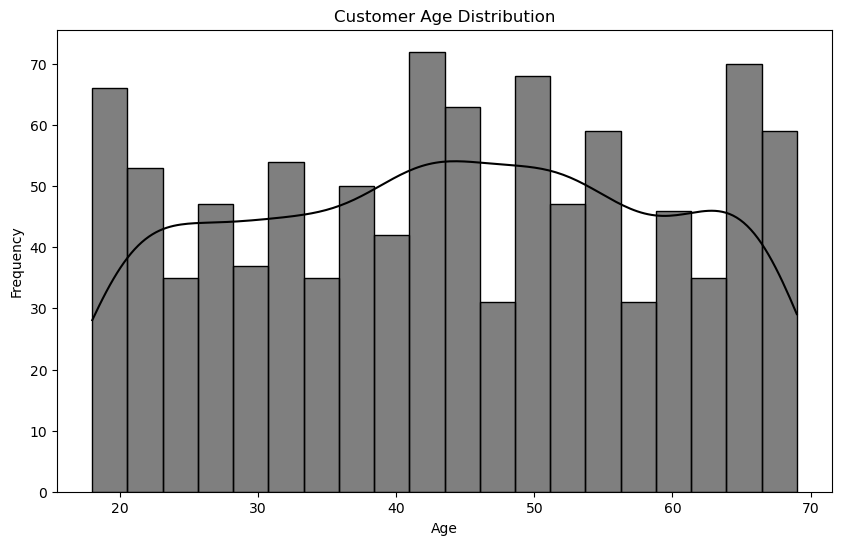

In [20]:
#Distribution of customer by Age
plt.figure(figsize=(10,6))
#plt.figure(figsize=(10, 6))
sns.histplot(data['Age'] , kde = True ,color ='black' , bins=20  )
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Customer Age Distribution')

Text(0, 0.5, 'Frequency')

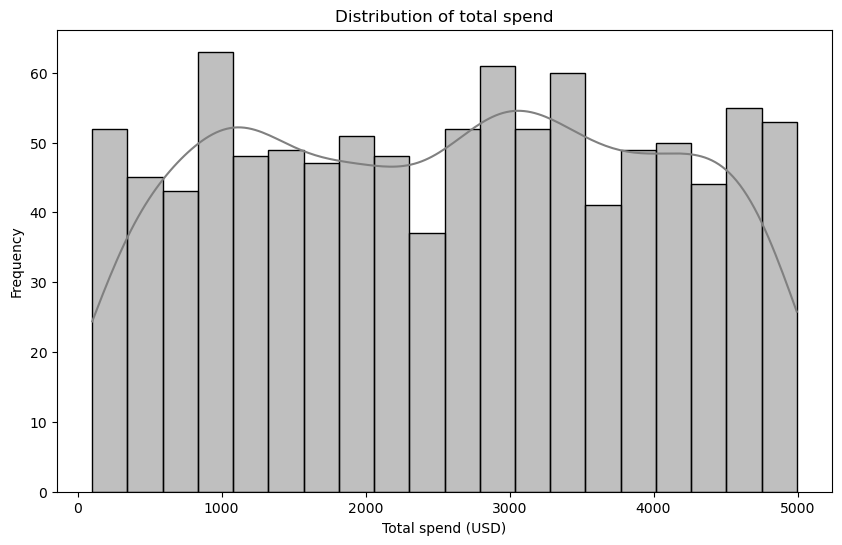

In [24]:
#Distribution of total spend
plt.figure(figsize=(10,6))
sns.histplot(data['Total_Spend'] ,kde = True , color='gray' ,bins=20)
plt.title('Distribution of total spend')
plt.xlabel('Total spend (USD)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Total spend(USD)')

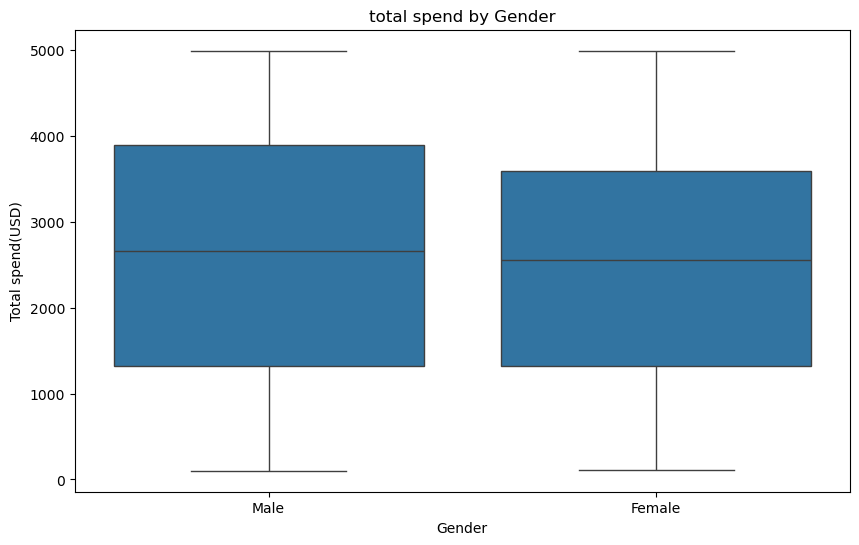

In [30]:
#Gender VS total spend
plt.figure(figsize=(10,6))
sns.boxplot(x='Gender' , y='Total_Spend' , data = data)
plt.title('total spend by Gender')
plt.xlabel('Gender')
plt.ylabel('Total spend(USD)')

Text(0.5, 1.0, 'Correlation Heatmap')

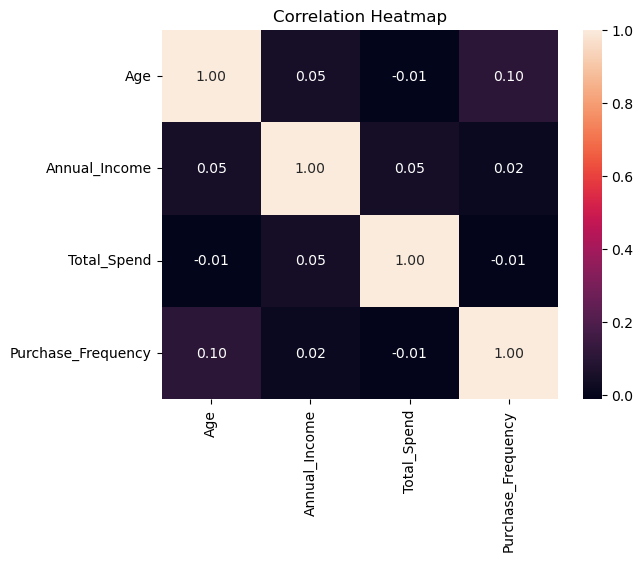

In [40]:
#Correletion matrix
corr = data[['Age','Annual_Income' ,'Total_Spend','Purchase_Frequency']].corr()
sns.heatmap(corr , annot =True ,fmt='.2f')
plt.title('Correlation Heatmap')

# Customer Segmentation

# A key part of customer behavior analysis is segmenting customers into meaningful groups based on their purchasing behavior. For example:

High-value customers: Customers with high total spend and high purchase frequency.
Frequent shoppers: Customers with high purchase frequency but lower total spend.
Discount-sensitive customers: Customers who purchase mostly during sales/discount periods.

In [44]:
#segment customer based on the purchase frequency
data['Spending_Category'] = pd.cut(data['Total_Spend'] ,bins=[0,500,1500,3000,np.inf] ,labels=['low','medium','high','very high'])
data['Spending_Category']
data['Purchase_frequency_category'] =pd.cut(data['Purchase_Frequency'] , bins=[0,5,10,20,np.inf] , labels=['low','medium','high','very high'])
data[['Customer_ID','Spending_Category','Purchase_frequency_category']]

,Customer_ID,Spending_Category,Purchase_frequency_category
0,CUST0001,high,medium
1,CUST0002,low,high
2,CUST0003,low,high
3,CUST0004,very high,high
4,CUST0005,high,high
...,...,...,...
995,CUST0996,high,very high
996,CUST0997,very high,high
997,CUST0998,very high,high
998,CUST0999,high,high


# split the data

In [48]:
from sklearn.model_selection import train_test_split

In [53]:
X=data[['Age','Annual_Income','Purchase_Frequency']]
y=data['Total_Spend']

# Train the model

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2 , random_state=42)

In [57]:
print(X_test)

     Age  Annual_Income  Purchase_Frequency
521   22         103360                   9
737   49         111652                   2
740   38          38752                   8
660   56         119073                  27
411   59          20619                   9
..   ...            ...                 ...
408   40         103310                  19
332   58          63585                  23
208   61          50087                  23
613   66         100758                   3
78    27         103807                   1

[200 rows x 3 columns]


In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lm=LinearRegression()

In [60]:
lm.fit(X_train,y_train)

LinearRegression()

In [62]:
y_pred = lm.predict(X_test)

In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [68]:
print("Mean absolute error : " , mean_absolute_error(y_test,y_pred))
print("R2_score : " , r2_score(y_test,y_pred))

Mean absolute error :  1213.8481870572398
R2_score :  0.0034574259685868913
